Description: This script reads in samples from an excel sheet, graphs the means of co and aerosol concentrations, and conducts a statistical analysis to determine whether or not there is a statistically signifiant differnce between the co/aerosol concentrations in cencus blocks of New York City where 75% or more of residents live below the 150% poverty line vs block where 25 or less of the residents live below the 150% poverty line. 
Author: Clio Bate, MSGIS  
Date Created: 05/02/2024  
Last date edited: 05/02/2024

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import sys  
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import levene

In [2]:
#install openpyxl
#!{sys.executable} -m pip install openpyxl

In [2]:
## read in data
excel = "data4visualizations.xlsx"
aero_sheet = pd.read_excel(excel, sheet_name='aerosol_pov_mean',index_col=None)
co_sheet = pd.read_excel(excel, sheet_name='co_pov_mean', index_col=None)

#print(co_sheet)

In [3]:
# bring in samples
# co pre
co_pre_75 = pd.read_excel(excel, sheet_name='copresample75',index_col=None)
co_pre_25 = pd.read_excel(excel, sheet_name='copresample25', index_col=None)

#co dur
co_dur_25 = pd.read_excel(excel, sheet_name='co_durSample25', index_col=None)
co_dur_75 = pd.read_excel(excel, sheet_name='co_durSample75',index_col=None)

# co post
co_post_75 = pd.read_excel(excel, sheet_name='co_postSample75', index_col=None)
co_post_25 = pd.read_excel(excel, sheet_name='co_postSample25', index_col=None)


#aerosol_pre
aerosol_pre_75 = pd.read_excel(excel, sheet_name='aerosol_preSample75', index_col=None)
aerosol_pre_25 = pd.read_excel(excel, sheet_name='aerosol_preSample25', index_col=None)


#aerosol_dur
aerosol_dur_75 = pd.read_excel(excel, sheet_name='aerosol_durSample75', index_col=None)
aerosol_dur_25 = pd.read_excel(excel, sheet_name='aerosol_durSample25', index_col=None)


#aerosol_post
aerosol_post_75 = pd.read_excel(excel, sheet_name='aerosol_postSample75', index_col=None)
aerosol_post_25 = pd.read_excel(excel, sheet_name='aerosol_postSample25', index_col=None)

## Graphs

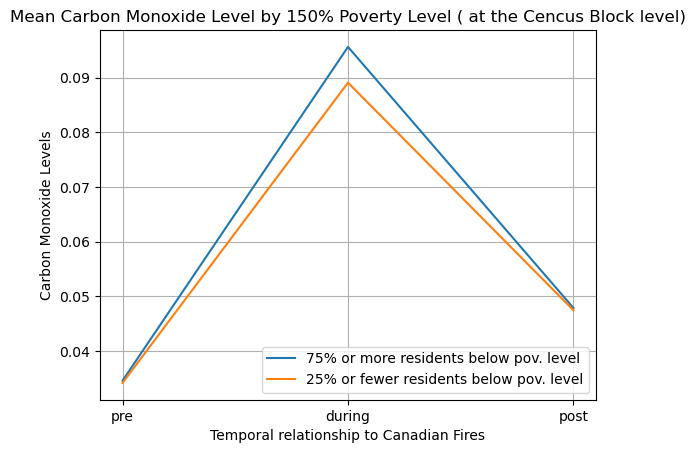

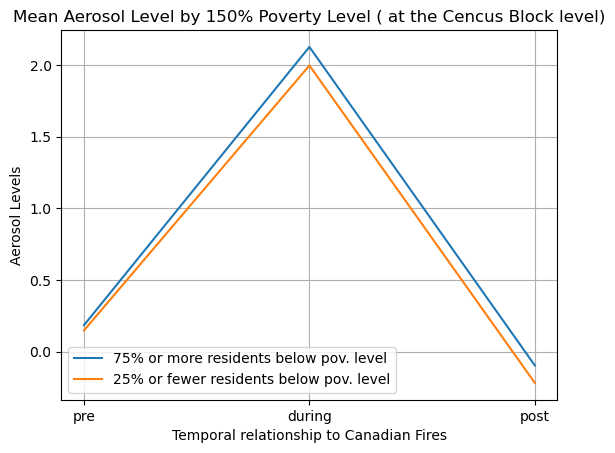

In [4]:
def graph(df, ColName75, ColName25, AorCO):
    '''

    This function takes four args
    1. name of the dataframe
    2. column name 1
    3. column anme 2
    4. whether or not its aerosol or co (string)

    and creates a line plot where the x-axis is pre, during, post values for co or aerosol in relation to the canadian wildfires in June 2023

    
    '''
    x_labels = ['pre', 'during', 'post']

    # Plot first line from first sheet
    plt.plot(x_labels, df[ColName75], label='75% or more residents below pov. level')
    plt.plot(x_labels, df[ColName25], label='25% or fewer residents below pov. level')

    # Add labels and title
    plt.xlabel('Temporal relationship to Canadian Fires')
    plt.ylabel('{} Levels'.format(AorCO)) ## change here for CO/Aerosol
    plt.title('Mean {} Level by 150% Poverty Level ( at the Cencus Block level)'.format(AorCO)) # change here for 
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.show()

graph(co_sheet, 'gr8er_than_75', 'less_than_25', "Carbon Monoxide")
graph(aero_sheet, 'gr8er_than_75', 'less_than_25', "Aerosol")

## Statistical Test


### Stat Function

In [6]:
def statAnalysis(df, colNamedf, df2, colNamedf2):
    '''
    
    This function takes four args
    1. df = first dataframe
    2. colNamedf = column name for first dataframe
    3. df2 = second dataframe
    4. colNamedf2 = column name for second df

    and 
    1. tests for normal distibution
    2. plots a histogram if one or both data is normally distributed
    3. if it is not normaly distibuted, perfroms a Levene variance test.
    4 will then perfom a t-test
    
    '''
    ## first df
    column_of_interest = df[colNamedf]
    column_of_interest2= df2[colNamedf2]
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(column_of_interest)
    statistic2, p_value2 = shapiro(column_of_interest2)

    # Print the results
    print("\n")
    print("-------------------------------------------------------------------------------{} vs {}---start".format(colNamedf, colNamedf2))
    print("Shapiro-Wilk Test {}:".format(colNamedf))
    print("Test Statistic:", statistic)
    print("p-value:", p_value)
    print("----------------------------------------")

      # Print the results df2
    print("Shapiro-Wilk Test {}:".format(colNamedf2))
    print("Test Statistic:", statistic2)
    print("p-value:", p_value2)
    print("----------------------------------------")
    
    # Check the significance level
    alpha = 0.05
    if p_value > alpha and p_value2 > alpha: #just changed and to or
        print("The data looks normally distributed (fail to reject H0)")
        plt.hist(df[colNamedf], bins=10, color='blue', alpha=0.7)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title("Histogram of {}".format(colNamedf))
        plt.grid(True)
        plt.show()

        print("----------------------------------------")

        plt.hist(df2[colNamedf2], bins=10, color='blue', alpha=0.7)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title("Histogram of {}".format(colNamedf2))
        plt.grid(True)
        plt.show()
        print("----------------------------------------")
    else:
        print("The data does not look normally distributed... continue to levene test")
        print("----------------------------------------")

        #check for variance 
        # Example: Test the equality of variances between two groups
        stat, p_value_lev = levene(df[colNamedf], df2[colNamedf2])

        # Interpret the result 
        # if the variances are equal, the ttest will preformed where equal_var=True. if not equal_var=false
        if p_value_lev > 0.05:
            print("Results of Levene test: the variances are equal")
            stat, p_value_lev = stats.ttest_ind(df[colNamedf], df2[colNamedf2],equal_var=True)
            alphattest = 0.01
            if p_value > alphattest:
                print("T-Test {} vs {}:".format(colNamedf, colNamedf2))
                print("stat= {}, p_value={}".format(stat, p_value))
                print("P_value > alpha. Accept the Null Hypothosis. There is a not statistically significant difference between the means.".format(alphattest))
            else:
                print("T-Test {} vs {}:".format(colNamedf, colNamedf2))
                print("stat= {}, p_value={}".format(stat, p_value))
                print(" P_value < {}. Reject the Null Hypothesis. There is a statistically significant difference between the means.".format(alphattest))
            
        else:
            print("Results of Levene test: the variances are NOT equal")
            # prform t-test where equal_var=false
            stat, p_value = stats.ttest_ind(df[colNamedf], df2[colNamedf2],equal_var=False)
            alphattest = 0.01
            if p_value > alphattest:
                print("T-Test {} vs {}:".format(colNamedf, colNamedf2))
                print("stat= {}, p_value={}".format(stat, p_value))
                print("P_value > alpha. Accept the Null Hypothosis. There is a not statistically significant difference between the means.".format(alphattest))
                print("\n")
            else:
                print("T-Test {} vs {}:".format(colNamedf, colNamedf2))
                print("stat= {}, p_value={}".format(stat, p_value))
                print("P_value < {}. Reject the Null Hypothesis. There is a statistically significant difference between the means.".format(alphattest))
                print("\n")
        

In [7]:
# call function
print("\n","Carbon Monoxide")
# co
statAnalysis(co_pre_75, 'copresample75', co_pre_25, 'copresample25')
statAnalysis(co_dur_75, 'co_durSample75', co_dur_25, 'co_durSample25')
statAnalysis(co_post_75, 'co_postSample75', co_post_25, 'co_postSample25')

print("\n""Aerosol")
# aerosol
statAnalysis(aerosol_pre_75,'aerosol_preSample75', aerosol_pre_25,'aerosol_preSample25')
statAnalysis(aerosol_dur_75,'aerosol_durSample75', aerosol_dur_25,'aerosol_durSample25')
statAnalysis(aerosol_post_75,'aerosol_postSample75', aerosol_post_25,'aerosol_postSample25')



 Carbon Monoxide


-------------------------------------------------------------------------------copresample75 vs copresample25---start
Shapiro-Wilk Test copresample75:
Test Statistic: 0.9862560356044754
p-value: 1.8174099383837593e-06
----------------------------------------
Shapiro-Wilk Test copresample25:
Test Statistic: 0.9760915755380984
p-value: 1.0778937162327386e-09
----------------------------------------
The data does not look normally distributed... continue to levene test
----------------------------------------
Results of Levene test: the variances are NOT equal
T-Test copresample75 vs copresample25:
stat= 4.353609794719784, p_value=1.4322021775843049e-05
P_value < 0.01. Reject the Null Hypothesis. There is a statistically significant difference between the means.




-------------------------------------------------------------------------------co_durSample75 vs co_durSample25---start
Shapiro-Wilk Test co_durSample75:
Test Statistic: 0.8596380730314546
p-value: 2.679399